# Clustering Student Survey data 
Objective: To group students into clusters base on their survey answers. 

Attribute info: <br>
instr: Instructor's identifier; values taken from {1,2,3} <br>
class: Course code (descriptor); values taken from {1-13} <br>
repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...} <br>
attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4} <br>
difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5} <br>
Q1: The semester course content, teaching method and evaluation system were provided at the start. <br>
Q2: The course aims and objectives were clearly stated at the beginning of the period. <br>
Q3: The course was worth the amount of credit assigned to it. <br>
Q4: The course was taught according to the syllabus announced on the first day of class. <br>
Q5:	The class discussions, homework assignments, applications and studies were satisfactory. <br>
Q6: The textbook and other courses resources were sufficient and up to date.	<br>
Q7: The course allowed field work, applications, laboratory, discussion and other studies. <br>
Q8: The quizzes, assignments, projects and exams contributed to helping the learning.	<br>
Q9: I greatly enjoyed the class and was eager to actively participate during the lectures. <br>
Q10: My initial expectations about the course were met at the end of the period or year. <br>
Q11: The course was relevant and beneficial to my professional development. <br>
Q12: The course helped me look at life and the world with a new perspective. <br>
Q13: The Instructor's knowledge was relevant and up to date. <br>
Q14: The Instructor came prepared for classes. <br>
Q15: The Instructor taught in accordance with the announced lesson plan. <br>
Q16: The Instructor was committed to the course and was understandable. <br>
Q17: The Instructor arrived on time for classes. <br>
Q18: The Instructor has a smooth and easy to follow delivery/speech. <br>
Q19: The Instructor made effective use of class hours. <br>
Q20: The Instructor explained the course and was eager to be helpful to students. <br>
Q21: The Instructor demonstrated a positive approach to students.<br> 
Q22: The Instructor was open and respectful of the views of students about the course. <br>
Q23: The Instructor encouraged participation in the course. <br>
Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students. <br>
Q25: The Instructor responded to questions about the course inside and outside of the course. <br>
Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives. <br>
Q27: The Instructor provided solutions to exams and discussed them with students. <br>
Q28: The Instructor treated all students in a right and objective manner. <br>

Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = '//Users//chung-tsengwang//Desktop//Github Repo//Clustering-Student-Survey-Data-with-Agglomerative-Hierarchical-Clustering//data//turkiye-student-evaluation_generic.csv'
data = pd.read_csv(file)
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
instr         5820 non-null int64
class         5820 non-null int64
nb.repeat     5820 non-null int64
attendance    5820 non-null int64
difficulty    5820 non-null int64
Q1            5820 non-null int64
Q2            5820 non-null int64
Q3            5820 non-null int64
Q4            5820 non-null int64
Q5            5820 non-null int64
Q6            5820 non-null int64
Q7            5820 non-null int64
Q8            5820 non-null int64
Q9            5820 non-null int64
Q10           5820 non-null int64
Q11           5820 non-null int64
Q12           5820 non-null int64
Q13           5820 non-null int64
Q14           5820 non-null int64
Q15           5820 non-null int64
Q16           5820 non-null int64
Q17           5820 non-null int64
Q18           5820 non-null int64
Q19           5820 non-null int64
Q20           5820 non-null int64
Q21           5820 non-null int64
Q22      

In [4]:
data.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


## Exploratory Data Analysis 

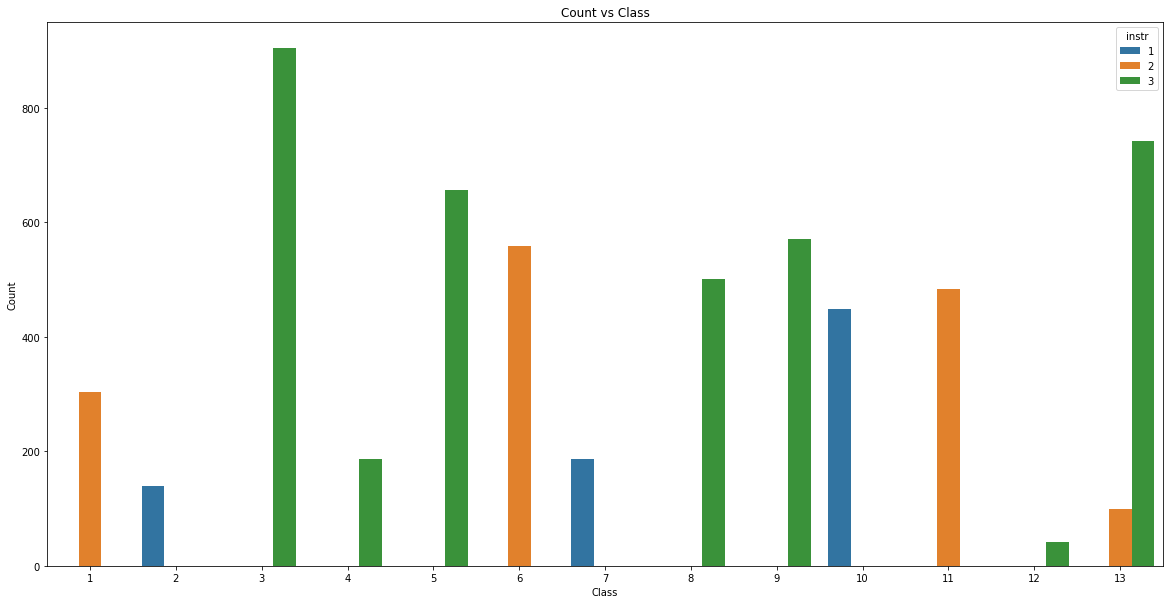

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Count vs Class')
sns.countplot(x = data['class'],hue = 'instr', data=data)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Difficulty vs Class

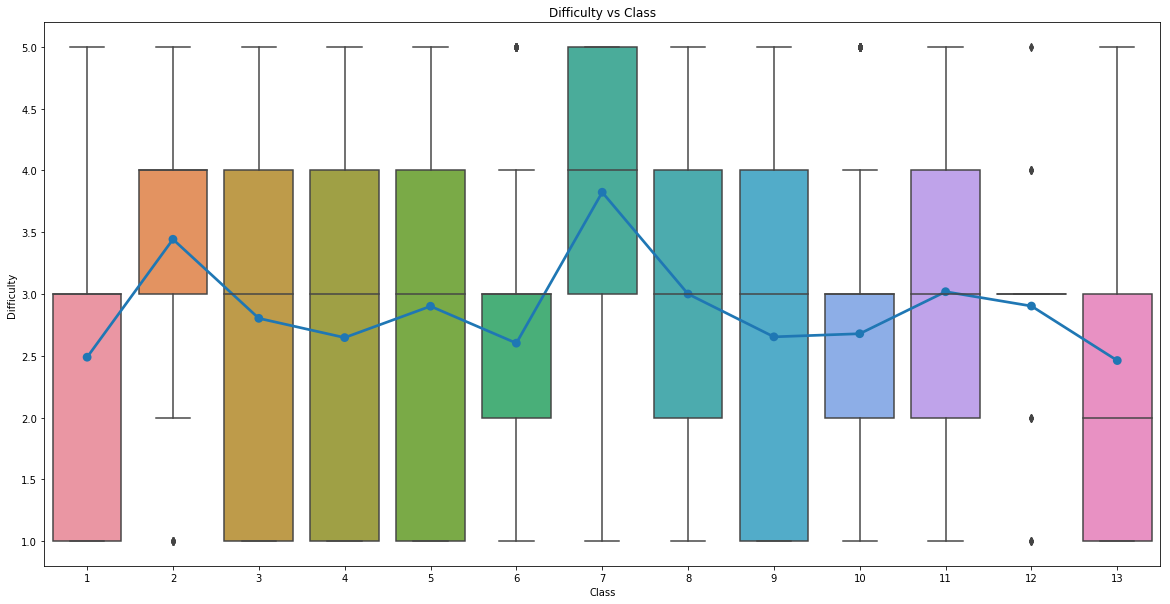

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Difficulty vs Class')
sns.boxplot(data['class'], data['difficulty'], ax=ax)
sns.pointplot(x='class', y='difficulty', data=data.groupby('class', as_index=False).mean(), ax=ax)
plt.xlabel('Class')
plt.ylabel('Difficulty')
plt.show()

## Attendance vs Class

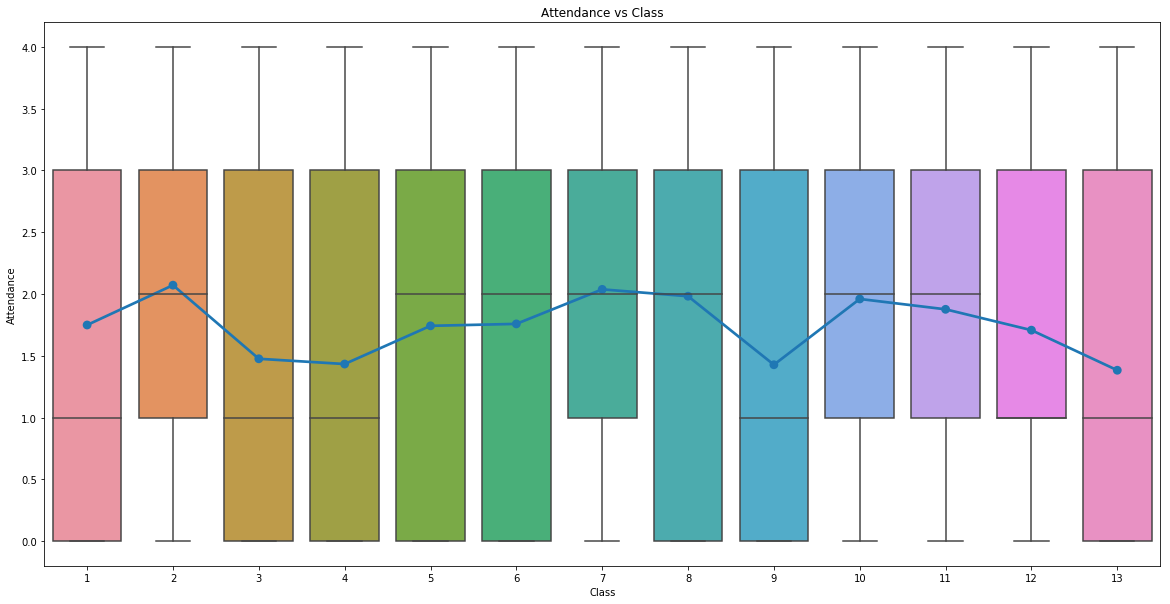

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Attendance vs Class')
sns.boxplot(data['class'], data['attendance'], ax=ax)
sns.pointplot(x='class', y='attendance', data=data.groupby('class', as_index=False).mean(), ax=ax)
plt.xlabel('Class')
plt.ylabel('Attendance')
plt.show()

## Visualizing data on a 2-D Plane 

In [10]:
#Dimensionality reduction packages
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [11]:
X = data.iloc[:,4:33]
X.head()

,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,4,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,4,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [39]:
pca = PCA(n_components= 3, random_state= 21)
X_transformed = pca.fit_transform(X)
X_transformed

array([[  0.96685776,   0.02043238,  -1.325049  ],
       [  0.98497438,  -0.38575457,  -0.41567279],
       [ -9.61170934,  -0.16173641,  -1.21119256],
       ..., 
       [ -9.61170934,  -0.16173641,  -1.21119256],
       [ 11.5816581 ,  -0.60977273,   0.37984698],
       [ 11.5816581 ,  -0.60977273,   0.37984698]])

In [40]:
pca.explained_variance_ratio_.cumsum()

array([ 0.79075555,  0.83547059,  0.87243371])

In [62]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as hier
clustering = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
model = clustering.fit(X_transformed)

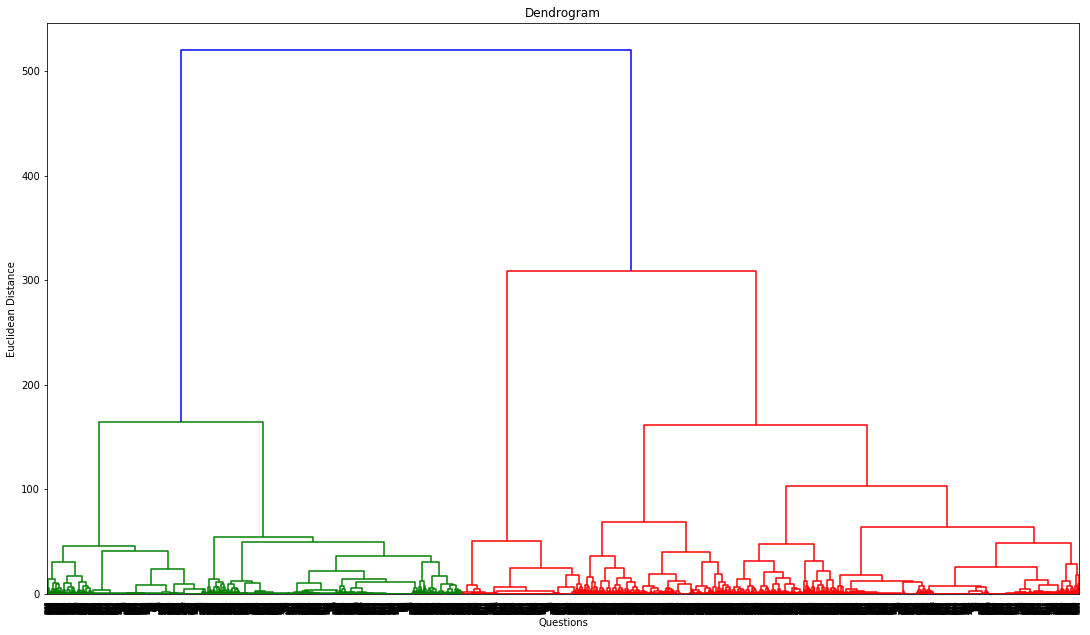

In [63]:
#Dendrogram
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
d = hier.dendrogram(hier.linkage(X_transformed, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Questions')
plt.ylabel('Euclidean Distance')
plt.show()

In [64]:
y = model.fit_predict(X_transformed)

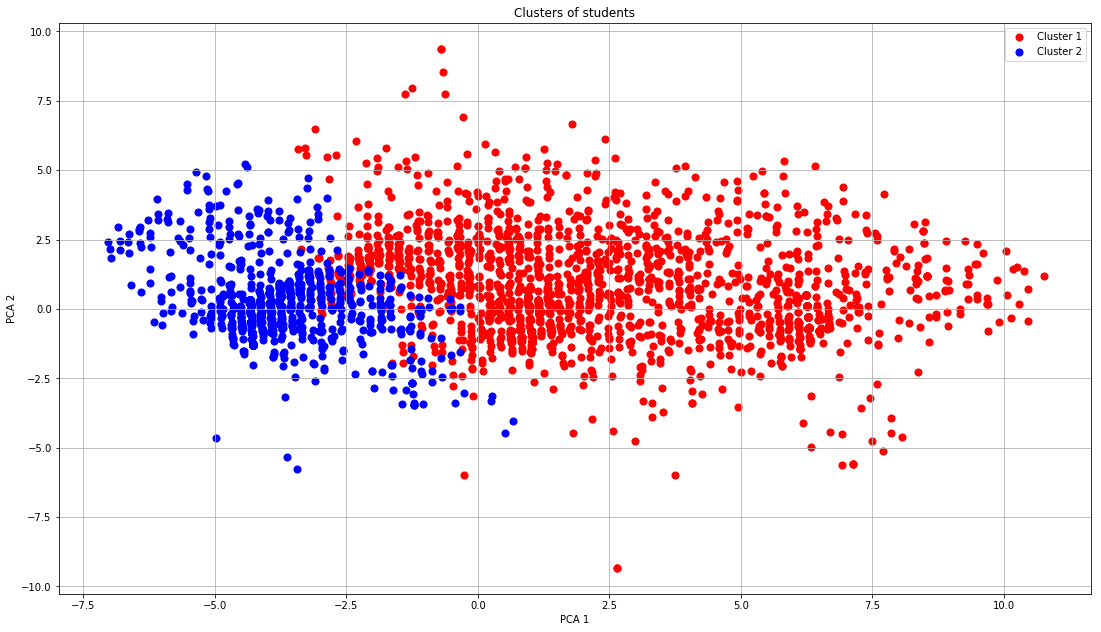

In [65]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.scatter(X_transformed[y == 0, 0], X_transformed[y == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_transformed[y == 1, 0], X_transformed[y == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid()
plt.show()
